In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data processing

In [ ]:
import os
import shutil
from PIL import Image
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
os.chdir('/content/drive/MyDrive/final_project')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/final_project'

In [ ]:
root_dir = os.getcwd() + '/data_processing/'
with_mask_dir = root_dir + 'with_mask/'
without_mask_dir = root_dir + 'without_mask/'
irre_dir = root_dir + 'irrelevant/'
with_mask_resized_dir = root_dir + 'with_mask_resized/'
without_mask_resized_dir = root_dir + 'without_mask_resized/'
irre_resized_dir = root_dir + 'irrelevant_resized/'
data_dir = root_dir + 'data/'

print("Root dir: ", root_dir, "\nWith mask dir: ", with_mask_dir, " \nWithout mask dir:", without_mask_dir)
print("Data dir: ", data_dir)

Root dir:  /content/drive/MyDrive/final_project/data_processing/ 
With mask dir:  /content/drive/MyDrive/final_project/data_processing/with_mask/  
Without mask dir: /content/drive/MyDrive/final_project/data_processing/without_mask/
Data dir:  /content/drive/MyDrive/final_project/data_processing/data/


In [ ]:
folder = os.path.exists(with_mask_resized_dir)
if not folder:
    os.makedirs(with_mask_resized_dir)
folder = os.path.exists(without_mask_resized_dir)
if not folder:
    os.makedirs(without_mask_resized_dir)
folder = os.path.exists(irre_resized_dir)
if not folder:
    os.makedirs(irre_resized_dir)

In [ ]:
os.makedirs(data_dir)

In [ ]:
def resize(ori_dir, target_dir):
    count = 0
    for root, dirs, files in os.walk(ori_dir):
        for i, filename in enumerate(files):
#             print("processing: ", filename)
            try:
                image = Image.open(ori_dir + filename)
                n = image.resize((100, 100))
                n.save(target_dir + filename )
            except:
                print("Resize failed, ready to remove")
                # os.remove(filename)
            count += 1
    print("Resize finished: ", count)

In [ ]:
resize(with_mask_dir, with_mask_resized_dir)

Resize failed, ready to remove
Resize finished:  2177


In [ ]:
resize(without_mask_dir, without_mask_resized_dir)

Resize failed, ready to remove
Resize finished:  4650


In [ ]:
resize(irre_dir, irre_resized_dir)

Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize failed, ready to remove
Resize f

In [ ]:
def augmentation(target_dir):
    count = 0
    for root, dirs, files in os.walk(target_dir):
        for filename in files:
            # print("processing: ", filename)
            try:
                image = Image.open(target_dir + filename)
                deg = random.randint(10, 15)
                n = image.rotate(deg)
                n.save(target_dir + "aug_" + str(deg) + "_" + filename)
                deg = random.randint(345, 350)
                n = image.rotate(deg)
                n.save(target_dir + "aug_" + str(deg) + "_" + filename)
                count += 1
            except:
                print("Skipping: ", filename)
    print("Resize finished: ", count, " Target dir: ", target_dir)

In [ ]:
augmentation(with_mask_resized_dir)

Resize finished:  2176  Target dir:  /content/drive/MyDrive/final_project/data_processing/with_mask_resized/


In [ ]:
augmentation(without_mask_resized_dir)

Resize finished:  4649  Target dir:  /content/drive/MyDrive/final_project/data_processing/without_mask_resized/


In [ ]:
len(os.listdir(with_mask_resized_dir))

6528

In [ ]:
augmentation(irre_resized_dir)

Skipping:  1415.jpg
Skipping:  1424.jpg
Skipping:  1427.jpg
Skipping:  1432.jpg
Skipping:  1458.jpg
Skipping:  1497.jpg
Skipping:  1502.jpg
Skipping:  1510.jpg
Skipping:  1518.jpg
Skipping:  1565.jpg
Skipping:  1567.jpg
Skipping:  1592.jpg
Skipping:  1599.jpg
Skipping:  1609.jpg
Skipping:  1616.jpg
Skipping:  1624.jpg
Skipping:  1625.jpg
Skipping:  1626.jpg
Skipping:  1665.jpg
Skipping:  1670.jpg
Skipping:  1709.jpg
Skipping:  1725.jpg
Skipping:  1729.jpg
Skipping:  1732.jpg
Skipping:  1776.jpg
Skipping:  1793.jpg
Skipping:  1797.jpg
Skipping:  1799.jpg
Skipping:  1815.jpg
Skipping:  1839.jpg
Skipping:  1844.jpg
Skipping:  1845 (1).jpg
Skipping:  1845.jpg
Skipping:  1882.jpg
Skipping:  1884.jpg
Skipping:  1892.jpg
Skipping:  1899.jpg
Skipping:  1903.jpg
Skipping:  1905.jpg
Skipping:  1910.jpg
Skipping:  1939.jpg
Skipping:  1944.jpg
Skipping:  1969.jpg
Skipping:  1973.jpg
Skipping:  1984.jpg
Skipping:  2006.jpg
Skipping:  2011.jpg
Skipping:  2012.jpg
Skipping:  2013.jpg
Skipping:  2036.

In [ ]:
def generate_labels():
    # Calculate the files sum
    count_with_mask_files = len(os.listdir(with_mask_resized_dir))
    count_without_mask_files = len(os.listdir(without_mask_resized_dir))
    count_no_face_files = len(os.listdir(irre_resized_dir))

    total_files = count_with_mask_files + count_without_mask_files + count_no_face_files
    print("Face with mask files: ", count_with_mask_files, " Face without mask files: ", count_without_mask_files, " No face files: ", count_no_face_files, " in total: ", total_files)

    label_without_mask = torch.zeros(count_without_mask_files)
    label_with_mask = torch.ones(count_with_mask_files)
    labels_no_face = 2 * torch.ones(count_no_face_files)
    labels = torch.cat((label_without_mask, label_with_mask, labels_no_face), 0).long()
    torch.save(labels, root_dir + 'labels.pt')
    print("Label writting success")
    print(len(labels))
    return count_with_mask_files, count_without_mask_files, count_no_face_files

def rename(target_dir, name_offset):
    for root, dirs, files in os.walk(target_dir):
        name = name_offset
        for filename in files:
            shutil.copyfile(target_dir + filename, data_dir + str(name) + '.jpg')
            name += 1
        print("Renaming done")

In [ ]:
c_with, c_without, c_no = generate_labels()

Face with mask files:  6528  Face without mask files:  10544  No face files:  2392  in total:  19464
Label writting success
19464


In [ ]:
rename(without_mask_resized_dir, 0)
rename(with_mask_resized_dir, c_without)
rename(irre_resized_dir, c_with + c_without)

Renaming done
Renaming done
Renaming done


In [ ]:
data_dir

'/content/drive/MyDrive/final_project/data_processing/data/'

Find data:  19464
index: 9220  label: 0


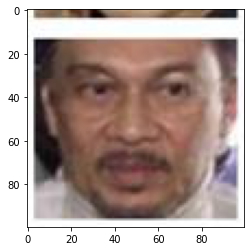

In [ ]:
total_data_files = len(os.listdir(data_dir))
print("Find data: ", total_data_files)

labels = torch.load(root_dir + 'labels.pt')
rand = random.randint(0, total_data_files)
print("index:", rand, " label:", labels[rand].item())
img = mpimg.imread(data_dir + str(rand) + '.jpg')
imgplot = plt.imshow(img)
plt.show()

### Data split

In [ ]:
import os
import shutil
from PIL import Image
import random
import torch

In [ ]:
os.chdir('/content/drive/MyDrive/final_project')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/final_project'

In [ ]:
## Set up folders
def ensure_folder(folder_name):
    try:
        os.makedirs(folder_name)
    except FileExistsError:
        print("File exists!")

root_dir = os.getcwd() + '/data_processing/'
data_dir = root_dir + 'data/'
train_set = root_dir + 'train_set/'
val_set = root_dir + 'val_set/'
test_set = root_dir + 'test_set/'

# Create folders
ensure_folder(train_set)
ensure_folder(val_set)
ensure_folder(test_set)

train_labels_file = root_dir + 'train_labels.pt'
val_labels_file = root_dir + 'val_labels.pt'
test_labels_file = root_dir + 'test_labels.pt'

In [ ]:
# Load original labels
labels = torch.load(root_dir + 'labels.pt')
data_size = len(labels)
print("Find data count: %s, Ready to split "% data_size)

Find data count: 19464, Ready to split 


In [ ]:
# Start to split data
val_size = int(data_size * 0.15)
test_size = int(data_size * 0.15)
train_size = data_size - val_size - test_size
print("Val size:",val_size, ", Test size:", test_size, ", train size:", (data_size - val_size - test_size))

Val size: 2919 , Test size: 2919 , train size: 13626


In [ ]:
data = torch.utils.data.random_split(torch.arange(data_size, dtype=torch.long), [val_size, test_size, train_size])

In [ ]:
def split_data(labels, inc, target_folder, target_label_file):
    inc_labels = []
    for i in range(0, len(data[inc])):
        # Save labels
        index = data[inc][i]
        # Mapping
        inc_labels.append(labels[index])
        filename = str(i)
        shutil.copyfile(data_dir + str(index.item()) + '.jpg', target_folder + filename + '.jpg')
    torch.save(torch.tensor(inc_labels), target_label_file)
    print("spliting %s done"%inc)

split_data(labels, 0, val_set, val_labels_file)
split_data(labels, 1, test_set, test_labels_file)
split_data(labels, 2, train_set, train_labels_file)

spliting 0 done
spliting 1 done
spliting 2 done


In [ ]:
len(labels)

19464

index: 7345  label: 0


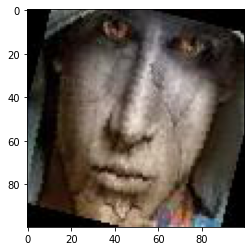

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_labels = torch.load(train_labels_file)
train_size = len(train_labels)

# val_labels = torch.load(val_labels_file)
# val_size = len(val_labels)
# test_labels = torch.load(test_labels_file)
# test_size = len(test_labels)

rand = random.randint(0, train_size)
print("index:", rand, " label:", train_labels[rand].item())
img = mpimg.imread(train_set + str(rand) + '.jpg')
imgplot = plt.imshow(img)
plt.show()

### Data visualization

In [ ]:
def get_value(root, target_label_file):
    labels = torch.load(target_label_file)
    without_mask = with_mask = no_face = 0
    for i in range(len(labels)):
        label = labels[i].item()
        if label == 0:
            without_mask += 1
        elif label == 1:
            with_mask += 1
        elif label == 2:
            no_face += 1
    return [without_mask, with_mask, no_face]

train:
without masks:  7427
with masks:  4527
no faces:  1672
val:
without masks:  1563
with masks:  986
no faces:  370
test:
without masks:  1554
with masks:  1015
no faces:  350


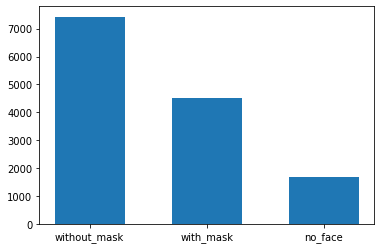

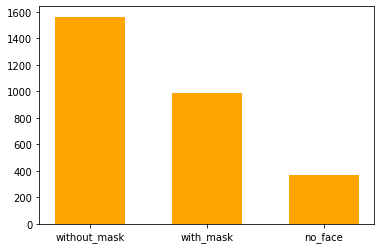

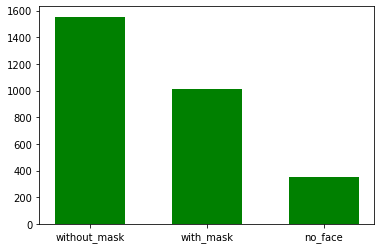

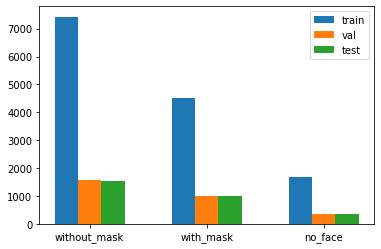

In [ ]:
train = get_value(train_set, train_labels_file)
val = get_value(val_set, val_labels_file)
test = get_value(test_set, test_labels_file)
labels = ['without_mask', 'with_mask', 'no_face']

print("train:")
print("without masks: ", train[0])
print("with masks: ", train[1])
print("no faces: ", train[2])
print("val:")
print("without masks: ", val[0])
print("with masks: ", val[1])
print("no faces: ", val[2])
print("test:")
print("without masks: ", test[0])
print("with masks: ", test[1])
print("no faces: ", test[2])

plt.bar(range(len(train)), train, width=0.6, tick_label=labels)
plt.show()
plt.bar(range(len(val)), val, width=0.6, tick_label=labels, fc='orange')
plt.show()
plt.bar(range(len(test)), test, width=0.6, tick_label=labels, fc='g')
plt.show()

x = np.arange(len(train))
total_width, n = 0.6, 3
width = total_width / n
x = x - (total_width - width) / 2
 
plt.bar(x, train, width=width, label='train')
plt.bar(x + width, val, width=width, label='val')
plt.bar(x + 2 * width, test, width=width, label='test')
plt.xticks(x + width, labels)
plt.legend()
plt.show()

In [ ]:
!ls

'Data Preparation_3_classes_simplified.ipynb'   LSTM.ipynb        val_labels.pt
'Data Preparation.ipynb'                        test_labels.pt
 data_processing/                               train_labels.pt


In [ ]:
!cp test_labels.pt /content/drive/MyDrive

In [ ]:
!zip -r /content/drive/MyDrive/final_project/data_processing/test_set.zip /content/drive/MyDrive/final_project/data_processing/test_set

  adding: content/drive/MyDrive/final_project/data_processing/test_set/ (stored 0%)
  adding: content/drive/MyDrive/final_project/data_processing/test_set/0.jpg (deflated 5%)
  adding: content/drive/MyDrive/final_project/data_processing/test_set/1.jpg (deflated 3%)
  adding: content/drive/MyDrive/final_project/data_processing/test_set/2.jpg (deflated 4%)
  adding: content/drive/MyDrive/final_project/data_processing/test_set/3.jpg (deflated 4%)
  adding: content/drive/MyDrive/final_project/data_processing/test_set/4.jpg (deflated 7%)
  adding: content/drive/MyDrive/final_project/data_processing/test_set/5.jpg (deflated 4%)
  adding: content/drive/MyDrive/final_project/data_processing/test_set/6.jpg (deflated 4%)
  adding: content/drive/MyDrive/final_project/data_processing/test_set/7.jpg (deflated 4%)
  adding: content/drive/MyDrive/final_project/data_processing/test_set/8.jpg (deflated 4%)
  adding: content/drive/MyDrive/final_project/data_processing/test_set/9.jpg (deflated 4%)
  addi

In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/final_project/data_processing/test_set.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>